# Encoder / Decoder

<img src="img/encoder-decoder.png" style="width: 95%; margin-left: auto; margin-right: auto;"/>

# Transformer

<img src="img/transformer.png" style="width: 45%; margin-left: auto; margin-right: auto;"/>

## Multi-Head Attention

<img src="img/multi-head-attention.png" style="width: 35%; margin-left: auto; margin-right: auto;"/>

## Scaled Dot-Product Attention

<img src="img/scaled-dot-prod-attention.png" style="width: 30%; margin-left: auto; margin-right: auto;"/>

In [1]:
!pip install transformers
!nvidia-smi

Tue Oct  6 16:07:27 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.66       Driver Version: 450.66       CUDA Version: 11.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  TITAN RTX           Off  | 00000000:01:00.0 Off |                  N/A |
| 41%   45C    P8    22W / 280W |    181MiB / 24217MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  TITAN RTX           Off  | 00000000:21:00.0 Off |                  N/A |
| 41%   

In [2]:
from transformers import GPT2LMHeadModel, GPT2TokenizerFast

In [3]:
pretrained_weights = 'gpt2'
tokenizer = GPT2TokenizerFast.from_pretrained(pretrained_weights)
model = GPT2LMHeadModel.from_pretrained(pretrained_weights)

In [4]:
ids = tokenizer.encode('This is an example of text, and')
ids

[1212, 318, 281, 1672, 286, 2420, 11, 290]

In [5]:
tokenizer.decode(ids)

'This is an example of text, and'

In [6]:
import torch
# device = torch.device('cuda:1')
# torch.cuda.set_device(device)

In [7]:
t = torch.LongTensor(ids)[None]
preds = model.generate(t)

Setting `pad_token_id` to 50256 (first `eos_token_id`) to generate sequence


In [8]:
preds.shape,preds[0]

(torch.Size([1, 20]),
 tensor([1212,  318,  281, 1672,  286, 2420,   11,  290,  340,  338,  407,  257,
          922,  530,   13,  198,  198,  464,  717, 1517]))

In [9]:
tokenizer.decode(preds[0].numpy())

"This is an example of text, and it's not a good one.\n\nThe first thing"

In [10]:
from fastai.text.all import *

In [11]:
path = untar_data(URLs.WIKITEXT_TINY)
path.ls()

(#2) [Path('/home/tc/.fastai/data/wikitext-2/test.csv'),Path('/home/tc/.fastai/data/wikitext-2/train.csv')]

In [12]:
df_train = pd.read_csv(path/'train.csv', header=None)
df_valid = pd.read_csv(path/'test.csv', header=None)
df_train.head()

,0
0,"\n = 2013 – 14 York City F.C. season = \n \n The 2013 – 14 season was the <unk> season of competitive association football and 77th season in the Football League played by York City Football Club , a professional football club based in York , North Yorkshire , England . Their 17th @-@ place finish in 2012 – 13 meant it was their second consecutive season in League Two . The season ran from 1 July 2013 to 30 June 2014 . \n Nigel Worthington , starting his first full season as York manager , made eight permanent summer signings . By the turn of the year York were only above the relegation z..."
1,"\n = Big Boy ( song ) = \n \n "" Big Boy "" <unk> "" I 'm A Big Boy Now "" was the first single ever recorded by the Jackson 5 , which was released by Steeltown Records in January 1968 . The group played instruments on many of their Steeltown compositions , including "" Big Boy "" . The song was neither a critical nor commercial success , but the Jackson family were delighted with the outcome nonetheless . \n The Jackson 5 would release a second single with Steeltown Records before moving to Motown Records . The group 's recordings at Steeltown Records were thought to be lost , but they were re..."
2,"\n = The Remix ( Lady Gaga album ) = \n \n The Remix is a remix album by American recording artist Lady Gaga . Released in Japan on March 3 , 2010 , it contains remixes of the songs from her first studio album , The Fame ( 2008 ) , and her third extended play , The Fame Monster ( 2009 ) . A revised version of the track list was prepared for release in additional markets , beginning with Mexico on May 3 , 2010 . A number of recording artists have produced the songs , including Pet Shop Boys , Passion Pit and The Sound of Arrows . The remixed versions feature both uptempo and <unk> composit..."
3,"\n = New Year 's Eve ( Up All Night ) = \n \n "" New Year 's Eve "" is the twelfth episode of the first season of the American comedy television series Up All Night . The episode originally aired on NBC in the United States on January 12 , 2012 . It was written by Erica <unk> and was directed by Beth McCarthy @-@ Miller . The episode also featured a guest appearance from Jason Lee as Chris and Reagan 's neighbor and Ava 's boyfriend , Kevin . \n During Reagan ( Christina Applegate ) and Chris 's ( Will <unk> ) first New Year 's Eve game night , Reagan 's competitiveness comes out causing Ch..."
4,"\n = Geopyxis carbonaria = \n \n Geopyxis carbonaria is a species of fungus in the genus Geopyxis , family <unk> . First described to science in 1805 , and given its current name in 1889 , the species is commonly known as the charcoal loving elf @-@ cup , dwarf <unk> cup , <unk> <unk> cup , or pixie cup . The small , <unk> @-@ shaped fruitbodies of the fungus are reddish @-@ brown with a whitish fringe and measure up to 2 cm ( 0 @.@ 8 in ) across . They have a short , tapered stalk . Fruitbodies are commonly found on soil where brush has recently been burned , sometimes in great numbers ...."


In [13]:
all_texts = np.concatenate([df_train[0].values, df_valid[0].values])

In [14]:
class TransformersTokenizer(Transform):
    def __init__(self, tokenizer): self.tokenizer = tokenizer
    def encodes(self, x): 
        toks = self.tokenizer.tokenize(x)
        return tensor(self.tokenizer.convert_tokens_to_ids(toks))
    def decodes(self, x): return TitledStr(self.tokenizer.decode(x.cpu().numpy()))

In [15]:
splits = [range_of(df_train), list(range(len(df_train), len(all_texts)))]
tls = TfmdLists(all_texts, TransformersTokenizer(tokenizer), splits=splits, dl_type=LMDataLoader)

In [16]:
tls.train[0],tls.valid[0]

(tensor([220, 198, 796,  ..., 198, 220, 198]),
 tensor([220, 198, 796,  ..., 198, 220, 198]))

In [17]:
tls.tfms(tls.train.items[0]).shape, tls.tfms(tls.valid.items[0]).shape

(torch.Size([4576]), torch.Size([1485]))

In [18]:
bs,sl = 8,1024
dls = tls.dataloaders(bs=bs, seq_len=sl)

In [19]:
dls.show_batch(max_n=2)

,text,text_
0,"\n = USS Atlanta ( 1861 ) = \n \n Atlanta was a casemate ironclad that served in the Confederate and Union <unk> during the American Civil War. She was converted from a Scottish @-@ built blockade runner named Fingal by the Confederacy after she made one run to Savannah, Georgia. After several failed attempts to attack Union <unk>, the ship was captured by two Union monitors in 1863 when she ran aground. Atlanta was floated off, repaired, and <unk>, serving in the Union Navy for the rest of the war. She spent most of her time deployed on the James River supporting Union forces there. The ship was decommissioned in 1865 and placed in reserve. Several years after the end of the war, Atlanta was sold to Haiti, but was lost at sea in December 1869 on her delivery voyage. \n \n = = Description and career as","\n = USS Atlanta ( 1861 ) = \n \n Atlanta was a casemate ironclad that served in the Confederate and Union <unk> during the American Civil War. She was converted from a Scottish @-@ built blockade runner named Fingal by the Confederacy after she made one run to Savannah, Georgia. After several failed attempts to attack Union <unk>, the ship was captured by two Union monitors in 1863 when she ran aground. Atlanta was floated off, repaired, and <unk>, serving in the Union Navy for the rest of the war. She spent most of her time deployed on the James River supporting Union forces there. The ship was decommissioned in 1865 and placed in reserve. Several years after the end of the war, Atlanta was sold to Haiti, but was lost at sea in December 1869 on her delivery voyage. \n \n = = Description and career as Fingal"
1,"classes at Second City at night. \n \n = = Career = = \n \n \n = = = Saturday Night Live ( 1997 – 2006 ) = = = \n \n While performing shows with The Second City in 1997, Fey submitted several scripts to NBC's variety show Saturday Night Live ( SNL ), at the request of its head writer Adam McKay, a former performer at Second City. She was hired as a writer for SNL following a meeting with SNL creator Lorne Michaels, and moved to New York from Chicago. Fey told The New Yorker, "" I 'd had my eye on the show forever, the way other kids have their eye on Derek <unk>. "" Originally, Fey "" struggled "" at SNL. Her first sketch to air starred Chris Farley in a <unk> <unk> Raphael satire. Fey went on to write a series of parodies,","at Second City at night. \n \n = = Career = = \n \n \n = = = Saturday Night Live ( 1997 – 2006 ) = = = \n \n While performing shows with The Second City in 1997, Fey submitted several scripts to NBC's variety show Saturday Night Live ( SNL ), at the request of its head writer Adam McKay, a former performer at Second City. She was hired as a writer for SNL following a meeting with SNL creator Lorne Michaels, and moved to New York from Chicago. Fey told The New Yorker, "" I 'd had my eye on the show forever, the way other kids have their eye on Derek <unk>. "" Originally, Fey "" struggled "" at SNL. Her first sketch to air starred Chris Farley in a <unk> <unk> Raphael satire. Fey went on to write a series of parodies, including"


In [20]:
def tokenize(text):
    toks = tokenizer.tokenize(text)
    return tensor(tokenizer.convert_tokens_to_ids(toks))

tokenized = [tokenize(t) for t in progress_bar(all_texts)]

In [21]:
class TransformersTokenizer(Transform):
    def __init__(self, tokenizer): self.tokenizer = tokenizer
    def encodes(self, x): 
        return x if isinstance(x, Tensor) else tokenize(x)
        
    def decodes(self, x): return TitledStr(self.tokenizer.decode(x.cpu().numpy()))

In [22]:
tls = TfmdLists(tokenized, TransformersTokenizer(tokenizer), splits=splits, dl_type=LMDataLoader)
dls = tls.dataloaders(bs=bs, seq_len=sl)

In [23]:
dls.show_batch(max_n=2)

,text,text_
0,"\n = 1986 Peach Bowl = \n \n The 1986 Peach Bowl was a post @-@ season American college football bowl game at Fulton County Stadium in Atlanta, Georgia between the Virginia Tech Hokies and the North Carolina State Wolfpack from on December 31, 1986. The game was the final contest of the 1986 NCAA Division I @-@ A football season for both teams, and ended in a 25 – 24 victory for Virginia Tech, the first bowl victory in school history. \n Virginia Tech came into the game with a 9 – 1 – 1 record that included an unusual win over the Temple Owls, who were forced to forfeit a victory to Virginia Tech after using an ineligible player. Facing the Hokies in the Peach Bowl were the 18th @-@ ranked Wolfpack from North Carolina State University. <unk> State was led by head coach Dick Sheridan and","\n = 1986 Peach Bowl = \n \n The 1986 Peach Bowl was a post @-@ season American college football bowl game at Fulton County Stadium in Atlanta, Georgia between the Virginia Tech Hokies and the North Carolina State Wolfpack from on December 31, 1986. The game was the final contest of the 1986 NCAA Division I @-@ A football season for both teams, and ended in a 25 – 24 victory for Virginia Tech, the first bowl victory in school history. \n Virginia Tech came into the game with a 9 – 1 – 1 record that included an unusual win over the Temple Owls, who were forced to forfeit a victory to Virginia Tech after using an ineligible player. Facing the Hokies in the Peach Bowl were the 18th @-@ ranked Wolfpack from North Carolina State University. <unk> State was led by head coach Dick Sheridan and had"
1,"> diverse and even contradictory traits of all objects or entity. "" \n Ācārya <unk> ( 11th century CE ) provides the analogy of the ocean to explain the nature of truth in <unk>, 116 : "" Water from the ocean contained in a pot can neither be called an ocean nor a non @-@ ocean, but simply a part of ocean. Similarly, a doctrine, though arising from absolute truth can neither be called a whole truth nor a non @-@ truth. "" \n <unk> <unk>, a 17th @-@ century Jain monk, went beyond anekāntavāda by advocating <unk>, meaning "" standing in the middle "" or "" <unk> "". This position allowed him to praise qualities in others even though the people were non @-@ Jain and belonged to other faiths. There was a period of stagnation after <unk>, as there were no new contributions to the development of Jain","diverse and even contradictory traits of all objects or entity. "" \n Ācārya <unk> ( 11th century CE ) provides the analogy of the ocean to explain the nature of truth in <unk>, 116 : "" Water from the ocean contained in a pot can neither be called an ocean nor a non @-@ ocean, but simply a part of ocean. Similarly, a doctrine, though arising from absolute truth can neither be called a whole truth nor a non @-@ truth. "" \n <unk> <unk>, a 17th @-@ century Jain monk, went beyond anekāntavāda by advocating <unk>, meaning "" standing in the middle "" or "" <unk> "". This position allowed him to praise qualities in others even though the people were non @-@ Jain and belonged to other faiths. There was a period of stagnation after <unk>, as there were no new contributions to the development of Jain"


In [24]:
class DropOutput(Callback):
    def after_pred(self): self.learn.pred = self.pred[0]

In [25]:
learn = Learner(dls, model, loss_func=CrossEntropyLossFlat(), cbs=[DropOutput], metrics=Perplexity()).to_fp16()

In [26]:
learn.validate()

(#2) [3.2425637245178223,25.599267959594727]

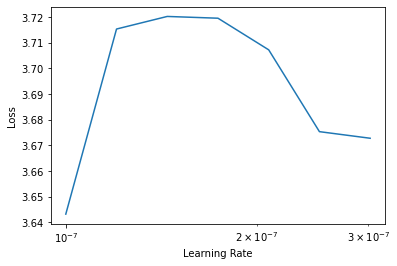

In [27]:
learn.lr_find()

In [28]:
learn.fit_one_cycle(1, 1e-4)

RuntimeError: CUDA out of memory. Tried to allocate 1.54 GiB (GPU 0; 23.65 GiB total capacity; 19.39 GiB already allocated; 1.29 GiB free; 21.33 GiB reserved in total by PyTorch)
Exception raised from malloc at /opt/conda/conda-bld/pytorch_1595629395347/work/c10/cuda/CUDACachingAllocator.cpp:272 (most recent call first):
frame #0: c10::Error::Error(c10::SourceLocation, std::string) + 0x4d (0x7ff1625f477d in /home/tc/Programming/Python/Miniconda3/envs/ml-training/lib/python3.8/site-packages/torch/lib/libc10.so)
frame #1: <unknown function> + 0x20626 (0x7ff16284c626 in /home/tc/Programming/Python/Miniconda3/envs/ml-training/lib/python3.8/site-packages/torch/lib/libc10_cuda.so)
frame #2: <unknown function> + 0x214f4 (0x7ff16284d4f4 in /home/tc/Programming/Python/Miniconda3/envs/ml-training/lib/python3.8/site-packages/torch/lib/libc10_cuda.so)
frame #3: <unknown function> + 0x21b81 (0x7ff16284db81 in /home/tc/Programming/Python/Miniconda3/envs/ml-training/lib/python3.8/site-packages/torch/lib/libc10_cuda.so)
frame #4: at::native::empty_cuda(c10::ArrayRef<long>, c10::TensorOptions const&, c10::optional<c10::MemoryFormat>) + 0x249 (0x7ff16574ee39 in /home/tc/Programming/Python/Miniconda3/envs/ml-training/lib/python3.8/site-packages/torch/lib/libtorch_cuda.so)
frame #5: <unknown function> + 0xd15c49 (0x7ff16376fc49 in /home/tc/Programming/Python/Miniconda3/envs/ml-training/lib/python3.8/site-packages/torch/lib/libtorch_cuda.so)
frame #6: <unknown function> + 0xd2fa77 (0x7ff163789a77 in /home/tc/Programming/Python/Miniconda3/envs/ml-training/lib/python3.8/site-packages/torch/lib/libtorch_cuda.so)
frame #7: <unknown function> + 0xe450dd (0x7ff199b940dd in /home/tc/Programming/Python/Miniconda3/envs/ml-training/lib/python3.8/site-packages/torch/lib/libtorch_cpu.so)
frame #8: <unknown function> + 0xe453f7 (0x7ff199b943f7 in /home/tc/Programming/Python/Miniconda3/envs/ml-training/lib/python3.8/site-packages/torch/lib/libtorch_cpu.so)
frame #9: at::empty(c10::ArrayRef<long>, c10::TensorOptions const&, c10::optional<c10::MemoryFormat>) + 0xfa (0x7ff199c9ee7a in /home/tc/Programming/Python/Miniconda3/envs/ml-training/lib/python3.8/site-packages/torch/lib/libtorch_cpu.so)
frame #10: at::native::empty_like(at::Tensor const&, c10::TensorOptions const&, c10::optional<c10::MemoryFormat>) + 0x49e (0x7ff19991d09e in /home/tc/Programming/Python/Miniconda3/envs/ml-training/lib/python3.8/site-packages/torch/lib/libtorch_cpu.so)
frame #11: <unknown function> + 0xfe3521 (0x7ff199d32521 in /home/tc/Programming/Python/Miniconda3/envs/ml-training/lib/python3.8/site-packages/torch/lib/libtorch_cpu.so)
frame #12: <unknown function> + 0x101ecc3 (0x7ff199d6dcc3 in /home/tc/Programming/Python/Miniconda3/envs/ml-training/lib/python3.8/site-packages/torch/lib/libtorch_cpu.so)
frame #13: at::empty_like(at::Tensor const&, c10::TensorOptions const&, c10::optional<c10::MemoryFormat>) + 0x101 (0x7ff199c81f91 in /home/tc/Programming/Python/Miniconda3/envs/ml-training/lib/python3.8/site-packages/torch/lib/libtorch_cpu.so)
frame #14: at::Tensor at::native::(anonymous namespace)::host_softmax_backward<at::native::(anonymous namespace)::LogSoftMaxBackwardEpilogue, true>(at::Tensor const&, at::Tensor const&, long, bool) + 0x16c (0x7ff164e9b24c in /home/tc/Programming/Python/Miniconda3/envs/ml-training/lib/python3.8/site-packages/torch/lib/libtorch_cuda.so)
frame #15: at::native::log_softmax_backward_cuda(at::Tensor const&, at::Tensor const&, long, at::Tensor const&) + 0x8d (0x7ff164e7651d in /home/tc/Programming/Python/Miniconda3/envs/ml-training/lib/python3.8/site-packages/torch/lib/libtorch_cuda.so)
frame #16: <unknown function> + 0xd038c0 (0x7ff16375d8c0 in /home/tc/Programming/Python/Miniconda3/envs/ml-training/lib/python3.8/site-packages/torch/lib/libtorch_cuda.so)
frame #17: <unknown function> + 0xe6f636 (0x7ff199bbe636 in /home/tc/Programming/Python/Miniconda3/envs/ml-training/lib/python3.8/site-packages/torch/lib/libtorch_cpu.so)
frame #18: at::_log_softmax_backward_data(at::Tensor const&, at::Tensor const&, long, at::Tensor const&) + 0x119 (0x7ff199c4caa9 in /home/tc/Programming/Python/Miniconda3/envs/ml-training/lib/python3.8/site-packages/torch/lib/libtorch_cpu.so)
frame #19: <unknown function> + 0x2c217ff (0x7ff19b9707ff in /home/tc/Programming/Python/Miniconda3/envs/ml-training/lib/python3.8/site-packages/torch/lib/libtorch_cpu.so)
frame #20: <unknown function> + 0xe6f636 (0x7ff199bbe636 in /home/tc/Programming/Python/Miniconda3/envs/ml-training/lib/python3.8/site-packages/torch/lib/libtorch_cpu.so)
frame #21: at::_log_softmax_backward_data(at::Tensor const&, at::Tensor const&, long, at::Tensor const&) + 0x119 (0x7ff199c4caa9 in /home/tc/Programming/Python/Miniconda3/envs/ml-training/lib/python3.8/site-packages/torch/lib/libtorch_cpu.so)
frame #22: torch::autograd::generated::LogSoftmaxBackward::apply(std::vector<at::Tensor, std::allocator<at::Tensor> >&&) + 0x1d7 (0x7ff19b7ec4b7 in /home/tc/Programming/Python/Miniconda3/envs/ml-training/lib/python3.8/site-packages/torch/lib/libtorch_cpu.so)
frame #23: <unknown function> + 0x30d1017 (0x7ff19be20017 in /home/tc/Programming/Python/Miniconda3/envs/ml-training/lib/python3.8/site-packages/torch/lib/libtorch_cpu.so)
frame #24: torch::autograd::Engine::evaluate_function(std::shared_ptr<torch::autograd::GraphTask>&, torch::autograd::Node*, torch::autograd::InputBuffer&, std::shared_ptr<torch::autograd::ReadyQueue> const&) + 0x1400 (0x7ff19be1b860 in /home/tc/Programming/Python/Miniconda3/envs/ml-training/lib/python3.8/site-packages/torch/lib/libtorch_cpu.so)
frame #25: torch::autograd::Engine::thread_main(std::shared_ptr<torch::autograd::GraphTask> const&) + 0x451 (0x7ff19be1c401 in /home/tc/Programming/Python/Miniconda3/envs/ml-training/lib/python3.8/site-packages/torch/lib/libtorch_cpu.so)
frame #26: torch::autograd::Engine::thread_init(int, std::shared_ptr<torch::autograd::ReadyQueue> const&, bool) + 0x89 (0x7ff19be14579 in /home/tc/Programming/Python/Miniconda3/envs/ml-training/lib/python3.8/site-packages/torch/lib/libtorch_cpu.so)
frame #27: torch::autograd::python::PythonEngine::thread_init(int, std::shared_ptr<torch::autograd::ReadyQueue> const&, bool) + 0x4a (0x7ff19fd341ba in /home/tc/Programming/Python/Miniconda3/envs/ml-training/lib/python3.8/site-packages/torch/lib/libtorch_python.so)
frame #28: <unknown function> + 0xc9067 (0x7ff1e0e2c067 in /home/tc/Programming/Python/Miniconda3/envs/ml-training/lib/python3.8/site-packages/zmq/backend/cython/../../../../.././libstdc++.so.6)
frame #29: <unknown function> + 0x9609 (0x7ff1e3452609 in /lib/x86_64-linux-gnu/libpthread.so.0)
frame #30: clone + 0x43 (0x7ff1e3379293 in /lib/x86_64-linux-gnu/libc.so.6)


In [ ]:
df_valid.head(1)

In [ ]:
prompt = "\n = Unicorn = \n \n A unicorn is a magical creature with a rainbow tail and a horn"